<a href="https://colab.research.google.com/github/lorek/test3/blob/main/Metropolis_workshop.ipynb"> OPEN IN COLAB </a>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import pandas as pd
import inspect
import urllib.request
import re
from collections import Counter
import string; 




## Read in cryptogram and book. Clean data

In [ ]:

cryptogram_data=urllib.request.urlopen("https://raw.githubusercontent.com/lorek/datasets/master/encrypted_message.txt")
for line in cryptogram_data:
  cryptogram=line.decode('utf-8')

  

In [ ]:
print(cryptogram[:100])
print(cryptogram[-100:])

print(len(cryptogram))


sjhmsXLmKNKmNomsXLmIpwpPjKmoXmKjeBgComoQNhmIjhhpPjmnFjphjmaBNojmjIpNFmoXmoQjmFjeoLBjBmaNoQmhFXPpwmGj
omAXIjmlwmqpImijgmbXamGXXwmEXmDMjwmnpCjBmOLjjwmvXXTmzjMjwmdBpMjFmYwNMjBhjmfNKjXmJXXFm BpgmsjhmujkBp

10016


Read Tolsto's "War and Peace"

In [ ]:
book_data=urllib.request.urlopen("https://raw.githubusercontent.com/lorek/datasets/master/war_and_peace.txt")
book=""
for line in book_data:
  book=book+str(line.decode('utf-8'))
print(len(book))

3238412


In [ ]:
print(book[0:220])





The Project Gutenberg EBook of War and Peace, by Leo Tolstoy

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the t


Clean data, make sure only a-z, A-Z and space are present

In [ ]:
#clean 

regex = re.compile('[^a-zA-Z ]')

regex_space=re.compile('\n')
book=re.sub('\s+', ' ', book).strip()
book=regex_space.sub(' ',book)
book=regex.sub('',book).strip()
print(len(book))
book=book.rstrip('\n')
print(len(book))

print(book[0:220])

cryptogram=re.sub('\s+', ' ', cryptogram).strip()
cryptogram=regex_space.sub(' ',cryptogram)
cryptogram=regex.sub('',cryptogram)
print(len(cryptogram))
cryptogram=cryptogram.rstrip('\n')
print(len(cryptogram))

print(cryptogram[:100])
print(cryptogram[-100:])
print(cryptogram)



3087852
3087852
The Project Gutenberg EBook of War and Peace by Leo Tolstoy This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever You may copy it give it away or reuse it under the terms of t
10015
10015
sjhmsXLmKNKmNomsXLmIpwpPjKmoXmKjeBgComoQNhmIjhhpPjmnFjphjmaBNojmjIpNFmoXmoQjmFjeoLBjBmaNoQmhFXPpwmGj
homAXIjmlwmqpImijgmbXamGXXwmEXmDMjwmnpCjBmOLjjwmvXXTmzjMjwmdBpMjFmYwNMjBhjmfNKjXmJXXFm BpgmsjhmujkBp
sjhmsXLmKNKmNomsXLmIpwpPjKmoXmKjeBgComoQNhmIjhhpPjmnFjphjmaBNojmjIpNFmoXmoQjmFjeoLBjBmaNoQmhFXPpwmGjoBXCXFNhmpFPXBNoQImpFFXahmoXmkBjpWmhLkhoNoLoNXwmeNCQjBhmrjheBNkjmhQXBoFgmgXLBmpCCBXpeQmdXmIpWjmNomjphNjBmoXmKjeBgComlmCLomQjBjmIXBjmhjwojwejhmNomKXjhmIpWjmNomjphNjBmTXBmGjoBXCXFNhmoXmKjeBgComNomlwmCpBoNeLFpBmNomNhmjphNjBmNTmpFFmoQjmFXajBmpwKmLCCjBmFjoojBhmpCCjpBmNwmoQNhmIjhhpPjmVjFXamNwTXBIpoNXwmXwmGjoBXCXFNhmpFPXBNoQImTBXImJNWNCjKNpmNhmeXCNjKmdQjmpFPXBNoQImaphmwpIjKmpTojBmENeQXFphmGjoBXCXFNhmaQXmpLoQXBjKmoQjmmpBoNeFjmycLpoNXwmXTmzopojmtpFeLFpoN

## Compute frequencies $M$

In [ ]:
# get unique characters from book, compute frequencies
letters = list(book)
letters_unique = set(letters+list(string.ascii_letters)+list(" "))
letters_unique = list(letters_unique)
letters_unique.sort()
print(letters_unique)
cntr=Counter(zip(letters,letters[1:]))
total = len(cntr)
M={''.join(k): v / total for k,v in cntr.most_common()}
M2={''.join(k): v  for k,v in cntr.most_common()}

for a in letters_unique:        
    tmp=0
    for b in letters_unique:
        if a+b in M2:
            tmp=tmp+M2[a+b]
            
    for b in letters_unique:
        if a+b in M2:
            M[a+b]=M2[a+b]/tmp

[' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
print(M2)
print(M['aa']); print(M['st'])

{'e ': 110921, ' t': 81503, 'd ': 75821, 'he': 72792, 'th': 68868, ' a': 63726, 's ': 62809, 't ': 58224, 'in': 47709, ' h': 46175, 'er': 43299, 'an': 42485, 'n ': 40718, ' s': 37824, ' w': 37735, 're': 35377, 'nd': 34573, ' o': 32563, 'y ': 31390, 'r ': 30853, 'ed': 28666, 'at': 27674, 'o ': 26738, 'ha': 26424, 'en': 26101, 'on': 26087, 'hi': 25287, 'ng': 24993, ' i': 24044, 'ou': 23472, 'to': 23341, 'g ': 22151, ' b': 21571, 'is': 21078, 'es': 20454, 'it': 20178, 'or': 19637, 'as': 19552, ' f': 19428, 'f ': 19379, ' c': 19235, 'te': 18330, 'st': 17638, 'ar': 17466, 'se': 17271, 'nt': 17225, 'of': 16833, 'le': 16619, ' m': 16282, 'h ': 15436, ' d': 15254, 'me': 15026, 'ne': 14632, 'a ': 14557, 've': 14404, 'ti': 13830, 'ro': 13564, 'al': 13543, 'ea': 13356, 'ho': 13282, 'll': 13212, ' p': 13174, 'de': 13152, 'ce': 13112, 'ri': 13063, 'l ': 12925, ' r': 12899, ' l': 12517, 'm ': 12479, 'wa': 12067, 'co': 11968, 'no': 11823, ' n': 11564, 'ad': 11234, 'om': 11066, 'ut': 10941, 'ch': 1072

## Mapping letters <-> numbers

In [ ]:
characters = list(dict.fromkeys(letters))
characters = list(dict.fromkeys(letters_unique))
 
number_of_characters=len(characters)

#mapping: letter -> number
char_mapping = dict(zip(letters_unique ,np.arange(len(characters))))
#print(char_mapping)

#inverse mapping: number -> letter 
char_mapping_inv = dict(map(reversed, char_mapping.items()))

In [ ]:
print(char_mapping)
print(char_mapping_inv)


{' ': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52}
{0: ' ', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'a', 28: 'b', 29: 'c', 30: 'd', 31: 'e', 32: 'f', 33: 'g', 34: 'h', 35: 'i', 36: 'j', 37: 'k', 38: 'l', 39: 'm', 40: 'n', 41: 'o', 42: 'p', 43: 'q', 44: 'r', 45: 's', 46: 't', 47: 'u', 48: 'v', 49: 'w', 50: 'x', 51: 'y', 52: 'z'}


## Main function: calc_likelihood_ratio
It computes: 
$${f(\sigma')\over f(\sigma)}=\prod_{i=1}^{L-1}{\textbf{M}(\sigma(c_i),\sigma(c_{i+1}))
\over \textbf{M}(\sigma'(c_i),\sigma'(c_{i+1}))},$$

In [ ]:
def calc_likelihood_ratio(encrypted_message, M, sigma, i, j, char_mapping_inv, char_mapping):
  # compute f(sigma')/f(sigma)
  # do not compute full f(sigma') and f(sigma), to large (small) numbers
  # Moreover, add some penalty if 'xy' is not in decrypted text
  
    likelihood_ratio = 1;
    sigma2=cp.copy(sigma)
    sigma2[[i,j]]=sigma2[[j,i]]

    M_min = min(M.values())
    penalty = M_min/10;

    for k in np.arange(len(encrypted_message)-1):
        a0=encrypted_message[k]
        b0=encrypted_message[k+1]
        if (char_mapping[a0]==i or char_mapping[a0]==j or char_mapping[b0]==i or char_mapping[b0]==j):
            
            a=char_mapping_inv[sigma[char_mapping[a0]]]
            b=char_mapping_inv[sigma[char_mapping[b0]]]
            ab=a+b
            
            a2=char_mapping_inv[sigma2[char_mapping[a0]]]
            b2=char_mapping_inv[sigma2[char_mapping[b0]]]
            ab2=a2+b2
        
            #print("ASDF ab = ", ab, ", ab2 = ", ab2)
            #if ((ab in M) and (ab2 in M)):
            if(ab2 in M):
                likelihood_ratio = likelihood_ratio*M[ab2];
            else:
                likelihood_ratio = likelihood_ratio*penalty;
                
            if(ab in M):
                likelihood_ratio = likelihood_ratio/M[ab];
            else:
                likelihood_ratio = likelihood_ratio/penalty;
                
                
                #print(" i = ", i,", j = ", j, ", a0 = ", a0, ", b0 = ", b0, ", k = ", k, "lik_rat=", likelihood_ratio)
                
                
            #quit()
        
    return likelihood_ratio;

In [ ]:
def transform_message(text_message, perm, char_mapping, char_mapping_inv):
    decrypted_message = ""
    for let in text_message:
        decrypted_message = decrypted_message +char_mapping_inv[perm[char_mapping[let]]]
    return decrypted_message    
 

## The Metropolis Algorithm
To sample from a distribution $\pi(\textbf{w})$, repeat *enough* number of steps (recall, we assume each $\textbf{w}$ has $m$ neighbours $\mathcal{N}(\mathbf{w})$:


*   Assume we are currently $\textbf{w}^{(t)}$
*   Choose a neighbour $\textbf{w}'$ of $\textbf{w}^{(t)}$ uniformly at random (i.e., with prob. $1/m$)
*   Set $\textbf{w}^{(t+1)}=\textbf{w}'$ with probability $\alpha=\min\left(1,{\pi(\textbf{w}')\over \pi(\textbf{w}^{(t)})}\right)$;
otherwise $\textbf{w}^{(t+1)}=\textbf{w}^{(t)}$ (i.e., do nothing)




In [ ]:
R=10000
#TRY ANOTHER SEED !!
np.random.seed(1432)
print(np.random.permutation(53))
print(number_of_characters)
sigma=np.random.permutation(number_of_characters)

tenth=int(R/10)    
show_length=50
# print(sigma)
# print(M['ab']); print(M['st'])
# print(char_mapping)
# print(char_mapping_inv[char_mapping['d']])
# print(len(book))

[23 45 39  2 51 38 41 30 20 28 31 26 10 21  5 19 50 11  4 44 32 33 46  9
 40 29 18  6 24  0 15 42 22 43  1  7 37 25 13  3 16 12 52 48 36 27 47 14
 17 49 35 34  8]
53


In [ ]:
print(M)

{'e ': 0.35629713859872286, ' t': 0.14391839156369082, 'd ': 0.6520553835569315, 'he': 0.4464671246319922, 'th': 0.3136165542617479, ' a': 0.11252767899080722, 's ': 0.39277473094408766, 't ': 0.2651450638226173, 'in': 0.2903314143836033, ' h': 0.08153603831090173, 'er': 0.13908376055197935, 'an': 0.21658671370381888, 'n ': 0.2254957883602572, ' s': 0.06678980212391006, ' w': 0.06663264549348948, 're': 0.2433499570077386, 'nd': 0.19146485316025275, ' o': 0.05749990288073401, 'y ': 0.6980053812456917, 'r ': 0.2122304385210662, 'ed': 0.09208007298050855, 'at': 0.14108086889583343, 'o ': 0.14188378880339614, 'ha': 0.16207065750736016, 'en': 0.08384085623610736, 'on': 0.13842929158928097, 'hi': 0.155096908734053, 'ng': 0.13841092977277636, ' i': 0.042457011481263046, 'ou': 0.12455293181215177, 'to': 0.1062920949210585, 'g ': 0.44280745242283703, ' b': 0.03809017612137436, 'is': 0.12826941567372174, 'es': 0.06570173071734187, 'it': 0.12279249783966019, 'or': 0.10420270628814009, 'as': 0.099

In [ ]:

for r in np.arange(R):   

  if (np.mod(r,tenth)==0 or r<10):
    metropolis_decrypted = transform_message(cryptogram, sigma, char_mapping, char_mapping_inv)
    print("r = ", r, "=",np.round(100*r/R,1),"%\tdecrypted = ", metropolis_decrypted[:show_length])
         
  sigma2=cp.copy(sigma)

  #random perm, but only take first two elements = i,j uniform and distinct
  tmp=np.random.permutation(number_of_characters)
  i=tmp[0]
  j=tmp[1]
  sigma2[[i,j]]=sigma2[[j,i]]
  
  ratio2 = calc_likelihood_ratio(cryptogram, M, sigma, i, j, char_mapping_inv, char_mapping)
  
  alpha=min(1,ratio2)
  U=np.random.random(1)[0]
  if (U<=alpha):
      sigma=cp.copy(sigma2)

r =  0 = 0.0 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  1 = 0.0 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  2 = 0.0 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  3 = 0.0 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  4 = 0.0 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  5 = 0.0 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  6 = 0.1 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  7 = 0.1 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  8 = 0.1 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  9 = 0.1 %	decrypted =  XLxFXZUFcMcFMsFXZUFkHnHSLcFsZFcLA EOsFsvMxFkLxxHSL
r =  1000 = 10.0 %	decrypted =  Neu Nab fof om Nab tsnsdef ma fecyghm miou teuusde
r =  2000 = 20.0 %	decrypted =  Yes Yai yuy um Yai tonodey ma yeprkhm mbus tessode
r =  3000 = 30.0 %	decrypted =  Bes Bau did 

In [ ]:
print(sigma)

[26 14 44 34 15 12 38  7 50 46 20 30 47 29 35 17 33 42  2  1 37 52  8 48
 41 21 36 49  6 43 19 32 11 51 45 24 31 28  9  0 22 39 27 23 13 25 18 10
  3 40 16  5  4]


In [ ]:
metropolis_decrypted = transform_message(cryptogram, sigma, char_mapping, char_mapping_inv)
print(metropolis_decrypted)

Yes You did im You tanaged mo defryhm mpis tessage Vlease wrime etail mo mpe lefmurer wimp slogan Gemroholis algorimpt allows mo breav subsmimumion fihpers Mesfribe spormly your ahhroafp So tave im easier mo defryhm I hum pere tore senmenfes im does tave im easier kor Gemroholis mo defryhm im In harmifular im is easier ik all mpe lower and uhher lemmers ahhear in mpis tessage Helow inkortamion on Gemroholis algorimpt krot Tivihedia is fohied Spe algorimpt was nated akmer Lifpolas Gemroholis wpo aumpored mpe  armifle Equamion ok Dmame Ralfulamions by Basm Rothuming Gafpines mogemper wimp Arianna T Cosenblump Garspall Cosenblump Augusma N Seller and Edward Seller Spis armifle hrohosed mpe algorimpt kor mpe fase ok syttemrifal hrohosal dismribumions and T X Nasmings exmended im mo mpe tore general fase in  Dote fonmrocersy exisms wimp regard mo fredim kor decelohtenm ok mpe algorimpt Gemroholis pad foined mpe mert Gonme Rarlo in an earlier armifle wimp Dmanislac Ulat was katiliar wimp mpe

# HOMEWORK: traveling salesman problem (TSP)

We are given 13 cities in US:

![13 cities in US](https://raw.githubusercontent.com/lorek/datasets/master/tsp_13cities.png)

The distances between each of them (they are numbered somehow) are given in a matrix M (miles?)

In [ ]:
M=np.array([
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ])
n=M.shape[0]

Set some permutation -- the orderding a salesman visits the cities:

$$f(\sigma)=\sum_{k=1}^{n-1}M(\sigma_k, \sigma_{k+1})+M(\sigma_n,\sigma_1).$$
  We aim at seeking 
  $$\sigma^*=\textrm{argmax}_{\sigma} (\exp(-f(\sigma))),$$

In [ ]:
sigma

array([26, 14, 44, 34, 15, 12, 38,  7, 50, 46, 20, 30, 47, 29, 35, 17, 33,
       42,  2,  1, 37, 52,  8, 48, 41, 21, 36, 49,  6, 43, 19, 32, 11, 51,
       45, 24, 31, 28,  9,  0, 22, 39, 27, 23, 13, 25, 18, 10,  3, 40, 16,
        5,  4])

In [ ]:
def calc_dist(M,sigma):
# a function computing total distance of a salesman
# with given M and sigma
# aka f(sigma)
	n=np.shape(sigma)[0];
	fsum=0;
	for i in np.arange(0,n-1):		
		fsum = fsum + M[sigma[i],sigma[i+1]]		
	fsum = fsum + M[sigma[n-1],sigma[0]]
	return fsum

In [ ]:
#Try several random permutations:
np.random.seed(1234)
dist_avg=0
nr_iter=10
for i in np.arange(nr_iter):
  sigma=np.random.permutation(n);
  dist = calc_dist(M,sigma)
  print("iter ", i, ", dist = ", dist)
  dist_avg += dist
dist_avg=dist_avg/nr_iter
print("Average dist = ", np.round(dist_avg,2))

iter  0 , dist =  17312
iter  1 , dist =  18501
iter  2 , dist =  12737
iter  3 , dist =  17488
iter  4 , dist =  16912
iter  5 , dist =  16266
iter  6 , dist =  16918
iter  7 , dist =  14318
iter  8 , dist =  12538
iter  9 , dist =  17693
Average dist =  16068.3


### TO DO: 
Come up with some $\pi(\sigma)$, as in substitution cipher, take $\sigma'$ as a neighbour of $\sigma$ if two elements are swapped. 
Write function tsp_calc_likelihood_ratio which computes $\pi(\sigma')/\pi(\sigma)$


In [ ]:
def tsp_calc_likelihood_ratio(M, sigma, i, j):
  ratio=1
  # TO DO _______ 
  # TO DO _______ 
  # TO DO _______ 
 
  return ratio;

### The Metropolis algorithm for TSP
start with some random $\sigma$

Best sigma give dist =  9247


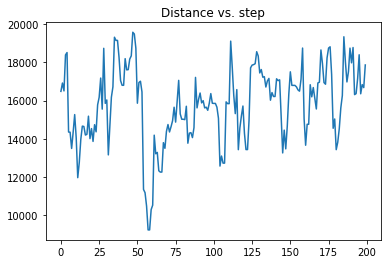

In [ ]:
sigma=np.random.permutation(n);

R = 200

sigma_best = cp.copy(sigma)
sigma_best_dist = calc_dist(M,sigma)
y=np.zeros(R)
for k in np.arange(R):    
    i = np.random.randint(n)
    j = np.random.randint(n)
	
    sigma2=cp.copy(sigma)
    sigma2[[i,j]]=sigma2[[j,i]]
   
    ratio = tsp_calc_likelihood_ratio(M, sigma, i, j)
    alpha=np.minimum(1,ratio)
    
    if np.random.rand(1)[0]<=alpha:
        sigma=cp.copy(sigma2)
                
    if calc_dist(M,sigma)<sigma_best_dist:
        sigma_best_dist = calc_dist(M,sigma)
        sigma_best = cp.copy(sigma)

    y[k]=calc_dist(M,sigma)

print("Best sigma give dist = ", np.round(sigma_best_dist,2))
plt.plot(np.arange(R),y)
plt.title("Distance vs. step")
plt.show()

	


With good/proper tsp_calc_ratio function you should get something similar to:

![alt text](https://raw.githubusercontent.com/lorek/datasets/master/tsp_dist.png)
